In [59]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

tickers_list=["^GSPC","^IXIC","^DJI"]

# Descargamos los datos. El resultado es un DataFrame con fechas en el índice y tickers en las columnas.
temp_df = yf.download(tickers_list, period='5y')
closes_df= temp_df['Close'].copy()



for ticker in tickers_list:
    closes_df[ticker + '_n'] = closes_df[ticker] / closes_df[ticker].iloc[0]

closes_df


C:\Users\adria\AppData\Local\Temp\ipykernel_21272\2559593241.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp_df = yf.download(tickers_list, period='5y')
[*********************100%***********************]  3 of 3 completed


Ticker,^DJI,^GSPC,^IXIC,^GSPC_n,^IXIC_n,^DJI_n
Date,,,,,,
2020-10-26,27685.380859,3400.969971,11358.940430,1.000000,1.000000,1.000000
2020-10-27,27463.189453,3390.679932,11431.349609,0.996974,1.006375,0.991974
2020-10-28,26519.949219,3271.030029,11004.870117,0.961793,0.968829,0.957904
2020-10-29,26659.109375,3310.110107,11185.589844,0.973284,0.984739,0.962931
2020-10-30,26501.599609,3269.959961,10911.589844,0.961479,0.960617,0.957242
...,...,...,...,...,...,...
2025-10-20,46706.578125,6735.129883,22990.539062,1.980356,2.024004,1.687048
2025-10-21,46924.738281,6735.350098,22953.669922,1.980420,2.020758,1.694928
2025-10-22,46590.410156,6699.399902,22740.400391,1.969850,2.001983,1.682852


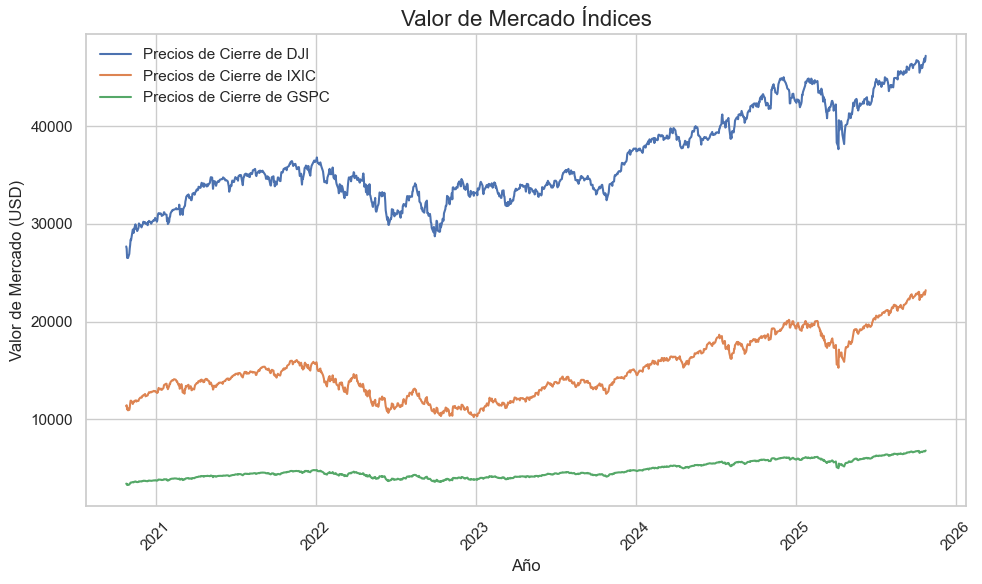

In [60]:
# Establecemos un estilo visual más agradable para todos nuestros gráficos
sns.set_theme(style="whitegrid")

# Creamos la figura y los ejes con Matplotlib. Esto nos da más control.
plt.figure(figsize=(10, 6))

# Graficamos la columna 'Close'
plt.plot(closes_df["^DJI"], label='Precios de Cierre de DJI')
plt.plot(closes_df["^IXIC"], label='Precios de Cierre de IXIC')
plt.plot(closes_df["^GSPC"], label='Precios de Cierre de GSPC')

# Usamos Matplotlib para añadir los toques finales y profesionales
plt.title('Valor de Mercado Índices', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Valor de Mercado (USD)', fontsize=12)
plt.xticks(rotation=45) # Rotamos las etiquetas del eje X si son muy largas
plt.legend()  # Muestra las etiquetas (labels) que definimos en los plots.

plt.tight_layout() # Ajusta el gráfico para que todo encaje bien
plt.show() # Muestra el gráfico final

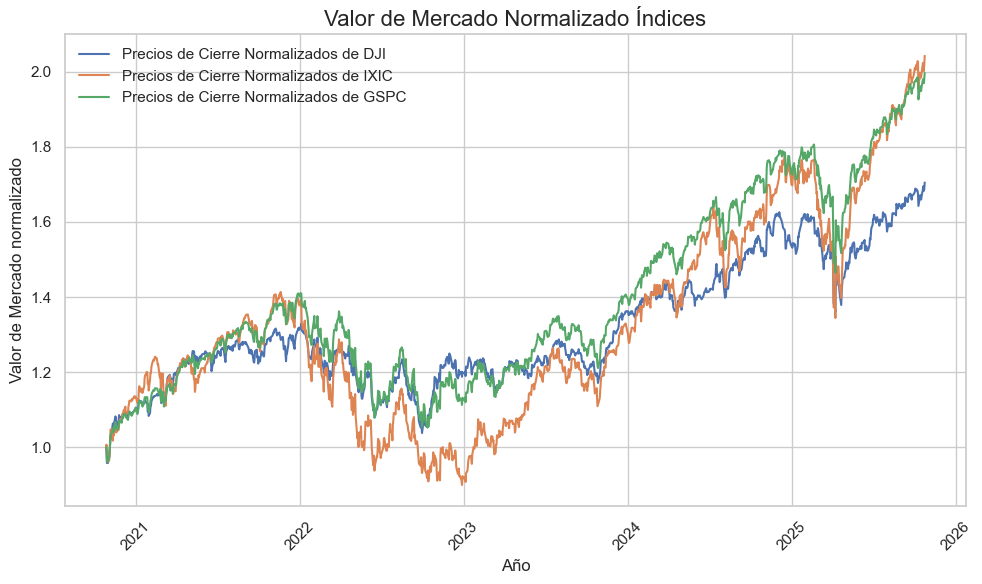

In [61]:
# Establecemos un estilo visual más agradable para todos nuestros gráficos
sns.set_theme(style="whitegrid")

# Creamos la figura y los ejes con Matplotlib. Esto nos da más control.
plt.figure(figsize=(10, 6))

# Graficamos la columna 'Close'
plt.plot(closes_df["^DJI_n"], label='Precios de Cierre Normalizados de DJI')
plt.plot(closes_df["^IXIC_n"], label='Precios de Cierre Normalizados de IXIC')
plt.plot(closes_df["^GSPC_n"], label='Precios de Cierre Normalizados de GSPC')

# Usamos Matplotlib para añadir los toques finales y profesionales
plt.title('Valor de Mercado Normalizado Índices', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Valor de Mercado normalizado', fontsize=12)
plt.xticks(rotation=45) # Rotamos las etiquetas del eje X si son muy largas
plt.legend()  # Muestra las etiquetas (labels) que definimos en los plots.

plt.tight_layout() # Ajusta el gráfico para que todo encaje bien
plt.show() # Muestra el gráfico final

C:\Users\adria\AppData\Local\Temp\ipykernel_21272\1742408753.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  closes_df = yf.download(tickers_list, period='5y')['Close'].copy()
[*********************100%***********************]  3 of 3 completed


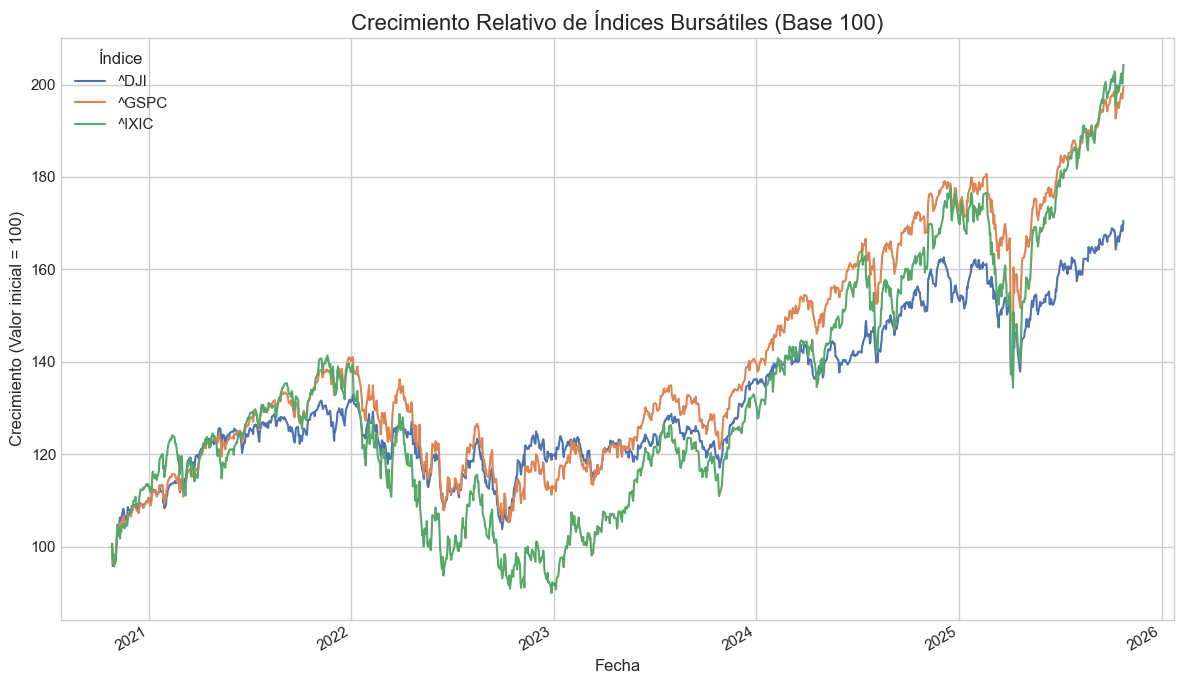

In [62]:
# Mejora final

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# --- 1. Adquisición y Preparación ---
tickers_list = ["^GSPC", "^IXIC", "^DJI"]
closes_df = yf.download(tickers_list, period='5y')['Close'].copy()

# --- 2. Normalización Vectorizada ---
# Normalizamos para que todos los índices empiecen en un valor base de 100
# Esto facilita la comparación del crecimiento porcentual
normalized_df = (closes_df / closes_df.iloc[0]) * 100

# --- 3. Visualización ---
plt.style.use('seaborn-v0_8-whitegrid') # Una forma alternativa de aplicar estilo
plt.figure(figsize=(12, 7))

# Graficamos directamente desde el DataFrame normalizado
# Pandas se integra con Matplotlib, así que puedes llamar a .plot() directamente
normalized_df.plot(ax=plt.gca()) # ax=plt.gca() le dice a pandas que dibuje en el gráfico actual

plt.title('Crecimiento Relativo de Índices Bursátiles (Base 100)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Crecimiento (Valor inicial = 100)', fontsize=12)
plt.legend(title='Índice')
plt.grid(True)
plt.tight_layout()
plt.show()